# Deep Convolutional Neural Network (DCNN) - LeNet

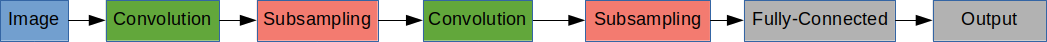

Characteristics:
* Convolutional and pooling layers alternate (one or more times)
* Fully connected layers are the last stage

## Convolutional Layer
Applying a 3 x 3 convolution on a 256 x 256 image with three input channels (or input filters), resulting in 32 output channels (or output filters).
<pre>
model = Sequential()
model.add(Conv2D(32, kernel_size=3, input_shape=(256, 256, 3))
</pre>

## Pooling Layer
Summarize the output of feature map typically from a convolutional layer.
### Max Pooling
Maximum activation as observed in the region. 
Example of a max-pooling layer of size 2 x 2:
<pre>
model.add(MaxPooling2D(pool_size = (2, 2)))
</pre>
### Average Pooling
Aggregates a region into the average values of the activations observed in that region.
### Other Pooling
List of pooling layers here: https://keras.io/layers/pooling/ 

## LeNet - Example of DCNN
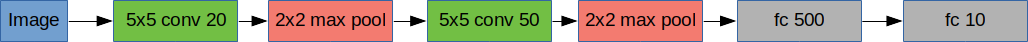
**reference:** Convolutional Networks for Images, Speech, and Time-Series, by Y. LeCun and Y. Bengio, brain theory neural networks, vol. 3361, 1995

In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

/home/hcmarchezi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#define the ConvNet
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        
        # 1st stages - convolution followed by max-pooling
        
        # CONV => RELU => POOL
        # 20 convolutional filters, each one of which has a size of 5 x 5
        model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second convolutional stage with ReLU activations followed  by a max-pooling.
        # 50 convolutional filters (should increase from previous layer) - common deep learning technique
        model.add(Conv2D(50, kernel_size=5, border_mode="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # 2nd stages - dense or classifier layers
        
        # Flatten => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        
        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return model with structure description
        return model       

In [3]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10 # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [4]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering("th")

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

print(X_train.shape)
print(X_test.shape)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(60000, 1, 28, 28)
(10000, 1, 28, 28)
60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [9]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
metrics=["accuracy"])
history = model.fit(X_train, y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

/home/hcmarchezi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 168s 4ms/step - loss: 0.1895 - acc: 0.9417 - val_loss: 0.0670 - val_acc: 0.9795
Epoch 2/20
48000/48000 [==============================] - 194s 4ms/step - loss: 0.0499 - acc: 0.9840 - val_loss: 0.0443 - val_acc: 0.9866
Epoch 3/20
48000/48000 [==============================] - 202s 4ms/step - loss: 0.0327 - acc: 0.9902 - val_loss: 0.0389 - val_acc: 0.9877
Epoch 4/20
48000/48000 [==============================] - 177s 4ms/step - loss: 0.0223 - acc: 0.9930 - val_loss: 0.0492 - val_acc: 0.9854
Epoch 5/20
48000/48000 [==============================] - 177s 4ms/step - loss: 0.0181 - acc: 0.9939 - val_loss: 0.0381 - val_acc: 0.9889
Epoch 6/20
48000/48000 [==============================] - 159s 3ms/step - loss: 0.0132 - acc: 0.9956 - val_loss: 0.0454 - val_acc: 0.9877
Epoch 7/20
48000/48000 [==============================] - 158s 3ms/step - loss: 0.0107 - acc: 0.9964 - val_loss: 0.0472 - 

In [10]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


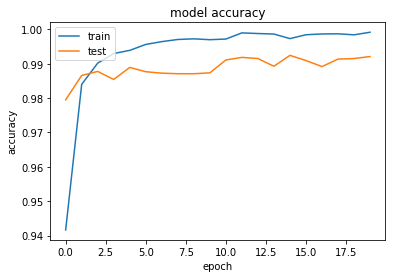

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

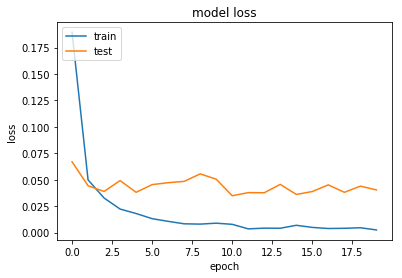

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()